## Importing the libraries needed for the treatment of the data.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import os
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "legend.title_fontsize" on line 22 in
C:\Users\adria\.matplotlib\stylelib\notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### AVDM, the project:
We first load the API corresponding to the used data set, from *Dades Obertes de Catalunya* and identificator bks7-dkfd.

In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("bks7-dkfd", limit=5848)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

results_df

,data_incendi,codi_comarca,comarca,codi_municipi,termemunic,haarbrades,hanoarbrad,hanoforest,haforestal
0,2011-01-11T00:00:00.000,8,Baix Camp,431299,Riudoms,0,0.2,0,0.2
1,2011-01-13T00:00:00.000,37,Terra Alta,430483,Corbera d'Ebre,0.2,0,0,0.2
2,2011-01-14T00:00:00.000,2,Alt Empordà,170545,Colera,0.01,0,0,0.01
3,2011-01-16T00:00:00.000,24,Osona,82802,Tavertet,0,0.02,0,0.02
4,2011-01-16T00:00:00.000,19,Garrotxa,171498,Riudaura,0,0.43,0,0.43
...,...,...,...,...,...,...,...,...,...
5843,2021-12-21T00:00:00.000,31,Ripollès,171479,Ripoll,0,0.1,0,0.1
5844,2021-12-23T00:00:00.000,2,Alt Empordà,170470,Castelló d'Empúries,0,0.2,0,0.2
5845,2021-12-29T00:00:00.000,8,Baix Camp,430094,Alforja,0,0.75,0,0.75
5846,2021-12-29T00:00:00.000,21,Maresme,82140,Vilassar de Dalt,0.01,0,0,0.01


### Interested in the extremal values:
We gather up the data by region (comarca), compute the total number of fires within the data set (year 2011 to 2021), write a document in which we show code of the region and total number of fires, as well as computing the region with minimum, maximum and an intermediate point of number of fires (2011-2021) and their corresponding codes. We print as output code of region and total number of fires.

In [3]:
vec_codis = []
vec_nincendis = []
num_incendis = open("num_incendis.txt", "w")

for i in range(1,43):
    indexes_comarca = results_df[results_df["codi_comarca"]==str(i)].index
    #print(indexes_comarca)
    n_ff_comarca = len(indexes_comarca)
    #print(n_ff_comarca)
    
    vec_codis.append(i)
    vec_nincendis.append(n_ff_comarca)
    
    num_incendis.write(str(i))
    num_incendis.write("\t")
    num_incendis.write(str(n_ff_comarca))
    num_incendis.write("\n")
    
    #print(i,n_ff_comarca)
    
min_nincendis = min(vec_nincendis)
max_nincendis = max(vec_nincendis)
codi_min = vec_codis[vec_nincendis.index(min_nincendis)]
codi_max = vec_codis[vec_nincendis.index(max_nincendis)]
min_cd_nincendis = [codi_min,min_nincendis]
max_cd_nincendis = [codi_max,max_nincendis]
print("Codi comarca i num. incendis (min):", min_cd_nincendis)
print("Codi comarca i num. incendis (max):", max_cd_nincendis)


#now the intermediate point,
pm = (max_nincendis-min_nincendis)/2.0
# we'll find the index of this one...
# we'll replace the elements of vec_nincendis by |vec_nincendis - pm| and find the minimum value
find_pm = []

for i in range(0,42):
    find_pm.append(abs(vec_nincendis[i]-pm))

min_find_pm = min(find_pm)
pos_pm = find_pm.index(min_find_pm)

codi_pm = vec_codis[pos_pm]
pm_nincendis = vec_nincendis[pos_pm]
pm_cd_nincendis = [codi_pm,pm_nincendis]
print("Codi comarca i num. incendis (intermig):", pm_cd_nincendis)

#we close the generated .txt document
num_incendis.close()

Codi comarca i num. incendis (min): [27, 5]
Codi comarca i num. incendis (max): [11, 368]
Codi comarca i num. incendis (intermig): [20, 181]


### Using 3 sets of regions:
We use three sets of regions, each set with a minimum, intermediate point and maximum. The ones computed in the above cell are the first one. The other two sets have been found by looking at the document written by running the above cell code. We print, by sets, the code and the number of fires. **Note**: the change from region code to name can be done using the regional data set provided by _Dades Obertes de Catalunya_, with identificator gsjn-sema.

In [4]:
# index's extrets a partir del document generat (i mirant a ull).
# afegeixo 2 minims, 2 inter. i 2 màxims a mà
# IMPRESCINDIBLE PER TREBALLAR AMB LES COMARQUES QUE PERTOCA!

codi_min_1 = codi_min
codi_min_2 = "39"
codi_min_3 = "5"

codi_max_1 = codi_max
codi_max_2 = "40"
codi_max_3 = "2"

codi_pm_1 = codi_pm
codi_pm_2 = "16"
codi_pm_3 = "21"

#we print the number of forest fires corresponding to each
pos_min_1 = vec_codis.index(int(codi_min_1))
pos_min_2 = vec_codis.index(int(codi_min_2))
pos_min_3 = vec_codis.index(int(codi_min_3))

pos_max_1 = vec_codis.index(int(codi_max_1))
pos_max_2 = vec_codis.index(int(codi_max_2))
pos_max_3 = vec_codis.index(int(codi_max_3))

pos_pm_1 = vec_codis.index(int(codi_pm_1))
pos_pm_2 = vec_codis.index(int(codi_pm_2))
pos_pm_3 = vec_codis.index(int(codi_pm_3))

print("Set 1")
print("Min. 1 (Codi, N incendis):", codi_min_1, vec_nincendis[pos_min_1])
print("Punt Intermig 1 (Codi, N incendis):", codi_pm_1, vec_nincendis[pos_pm_1])
print("Max. 1 (Codi, N incendis):", codi_max_1, vec_nincendis[pos_max_1])
print("\n")

print("Set 2")
print("Min. 2 (Codi, N incendis):", codi_min_2, vec_nincendis[pos_min_2])
print("Punt Intermig 2 (Codi, N incendis):", codi_pm_2, vec_nincendis[pos_pm_2])
print("Max. 2 (Codi, N incendis):", codi_max_2, vec_nincendis[pos_max_2])
print("\n")

print("Set 3")
print("Min. 3 (Codi, N incendis):", codi_min_3, vec_nincendis[pos_min_3])
print("Punt Intermig 3 (Codi, N incendis):", codi_pm_3, vec_nincendis[pos_pm_3])
print("Max. 3 (Codi, N incendis):", codi_max_3, vec_nincendis[pos_max_3])

Set 1
Min. 1 (Codi, N incendis): 27 5
Punt Intermig 1 (Codi, N incendis): 20 181
Max. 1 (Codi, N incendis): 11 368


Set 2
Min. 2 (Codi, N incendis): 39 21
Punt Intermig 2 (Codi, N incendis): 16 175
Max. 2 (Codi, N incendis): 40 343


Set 3
Min. 3 (Codi, N incendis): 5 31
Punt Intermig 3 (Codi, N incendis): 21 189
Max. 3 (Codi, N incendis): 2 279


### Map of catalonia 1:
We now gather information by **region (comarca)** and make a heatmap for the _total burned forestal area_, step by step. We also write a document with the name of the **region** and the total number of fires (demanded by a colleague).

In [5]:
# map of catalonia, forest fires between 2011 and 2021
cat = gpd.read_file("./extra/divisions-administratives-v2r1-comarques-1000000-20220801.shp", crs='EPSG:4326')
results_df = results_df.replace("Aran", "Val d'Aran") #we change the name Val d'Aran to Aran

# let's now merge the two DataFrame,

cat.rename(columns = {'NOMCOMAR':'comarca'}, inplace = True)
merged_df = results_df.merge(cat, how='left', on='comarca')
merged_gdf = gpd.GeoDataFrame(merged_df, geometry="geometry", crs="EPSG:4326")


# let's now use the merged_df DataFrame to write the number of forest firest on each comarca
# so that later on we can merge the total forestal area DataFrame with the total number of 
# forestfires
num_incendis = open("num_incendis_final.csv", "w")
num_incendis.write("comarca")
num_incendis.write("\t")
num_incendis.write("num_incendis")
num_incendis.write("\n")

for i in range(1,43):
    indexes_comarca = merged_df[merged_df["codi_comarca"]==str(i)].index

    n_ff_comarca = len(indexes_comarca)
    nom_comarca = merged_df[merged_df["codi_comarca"]==str(i)].comarca.iloc[0]
    
    num_incendis.write(str(nom_comarca))
    num_incendis.write("\t")
    num_incendis.write(str(n_ff_comarca))
    num_incendis.write("\n")
    #print(i,n_ff_comarca)

num_incendis.close()

merged_df

,data_incendi,codi_comarca,comarca,codi_municipi,termemunic,haarbrades,hanoarbrad,hanoforest,haforestal,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,2011-01-11T00:00:00.000,8,Baix Camp,431299,Riudoms,0,0.2,0,0.2,08,Reus,696.4883,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
1,2011-01-13T00:00:00.000,37,Terra Alta,430483,Corbera d'Ebre,0.2,0,0,0.2,37,Gandesa,742.6641,"POLYGON ((280206.273 4568311.294, 280325.826 4..."
2,2011-01-14T00:00:00.000,2,Alt Empordà,170545,Colera,0.01,0,0,0.01,02,Figueres,1356.6431,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
3,2011-01-16T00:00:00.000,24,Osona,82802,Tavertet,0,0.02,0,0.02,24,Vic,1246.9802,"MULTIPOLYGON (((418580.652 4643167.275, 418307..."
4,2011-01-16T00:00:00.000,19,Garrotxa,171498,Riudaura,0,0.43,0,0.43,19,Olot,733.3229,"POLYGON ((462293.700 4686958.700, 462409.651 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,2021-12-21T00:00:00.000,31,Ripollès,171479,Ripoll,0,0.1,0,0.1,31,Ripoll,956.8939,"MULTIPOLYGON (((419785.996 4664417.149, 419923..."
5844,2021-12-23T00:00:00.000,2,Alt Empordà,170470,Castelló d'Empúries,0,0.2,0,0.2,02,Figueres,1356.6431,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
5845,2021-12-29T00:00:00.000,8,Baix Camp,430094,Alforja,0,0.75,0,0.75,08,Reus,696.4883,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
5846,2021-12-29T00:00:00.000,21,Maresme,82140,Vilassar de Dalt,0.01,0,0,0.01,21,Mataró,397.9019,"POLYGON ((477054.900 4621435.100, 478728.500 4..."


In [6]:
# first we convert haforestal into a float number. 
# merge with the geometry dataset for catalonia
# taken from Chaotique, GitHub.

results_df['haforestal'] = results_df['haforestal'].astype(float)
haforestal_comarca = results_df.groupby(['comarca']).sum()


merged_haforestal_comarca = haforestal_comarca.merge(cat, how='left', on='comarca')

merged_haforestal_comarca_gpd = gpd.GeoDataFrame(merged_haforestal_comarca, geometry="geometry", crs="EPSG:4326")
merged_haforestal_comarca_gpd

,comarca,haforestal,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,Alt Camp,557.2452,01,Valls,537.6317,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,Alt Empordà,9601.7988,02,Figueres,1356.6431,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
2,Alt Penedès,637.9081,03,Vilafranca del Penedès,592.5498,"POLYGON ((386593.300 4595896.200, 388616.100 4..."
3,Alt Urgell,251.4526,04,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
4,Alta Ribagorça,249.9024,05,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4..."
5,Anoia,1385.2753,06,Igualada,867.0471,"POLYGON ((371426.378 4628557.172, 372106.708 4..."
6,Bages,684.0259,07,Manresa,1092.7982,"POLYGON ((417259.067 4646530.811, 417513.903 4..."
7,Baix Camp,106.2638,08,Reus,696.4883,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
8,Baix Ebre,537.5736,09,Tortosa,1001.9306,"MULTIPOLYGON (((311847.200 4514855.880, 311833..."
9,Baix Empordà,1397.0663,10,la Bisbal d'Empordà,701.1353,"MULTIPOLYGON (((498479.410 4622829.390, 498478..."


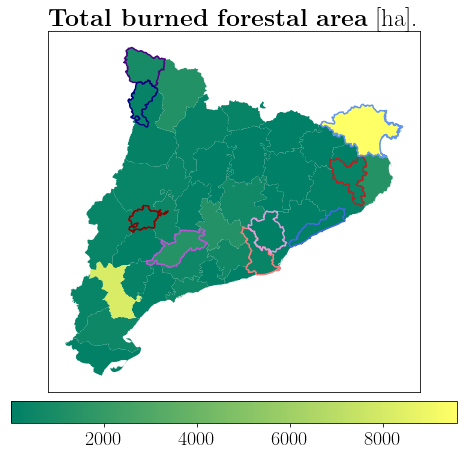

In [26]:
# color settings for the map
colors = {"Pla d'Urgell":'darkred',
          "Gironès":'firebrick',
          "Baix Llobregat":'lightcoral',
          "Val d'Aran":'indigo',
          "Conca de Barberà":'mediumorchid',
          "Vallès Occidental":'plum',
          "Alta Ribagorça":'navy',
          "Maresme":'royalblue',
          "Alt Empordà":'cornflowerblue'}

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'\textbf{Total burned forestal area} [ha].', fontsize = 25)
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
merged_haforestal_comarca_gpd.plot(column = 'haforestal',
                                  ax=ax,
                                  cmap='summer',
                                  legend=True,
                                  legend_kwds={#'label': "Total burned forestal area [ha]",
                                               'orientation': "horizontal", 'pad': 0.02})
merged_haforestal_comarca_gpd = merged_haforestal_comarca_gpd.set_index("comarca")
merged_haforestal_comarca_gpd.loc[list(colors.keys()),:].boundary.plot(ax=ax,color=list(colors.values()))
merged_haforestal_comarca_gpd = merged_haforestal_comarca_gpd.reset_index()

cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=20)
plt.savefig("total_haforestal_comarca.pdf")

### Map of Catalonia 2:
We are not interested in making a map representing the total number of fires between 2011 and 2021, we proceed similarly.

In [8]:
# merged_haforestal_comarca_ with the total number of
num_incendis_df = gpd.read_file('./num_incendis_final.csv')
num_incendis_df = num_incendis_df.drop(columns="geometry")
#num_incendis_df

merged_num_incendis_df = merged_haforestal_comarca_gpd.merge(num_incendis_df, how='left', on='comarca')
merged_num_incendis_df
merged_num_incendis_gdf = gpd.GeoDataFrame(merged_num_incendis_df, geometry="geometry", crs="EPSG:4326")
merged_num_incendis_gdf['num_incendis'] = merged_num_incendis_gdf['num_incendis'].astype(float)
merged_num_incendis_gdf

,comarca,haforestal,CODICOMAR,CAPCOMAR,AREAC5000,geometry,num_incendis
0,Alt Camp,557.2452,01,Valls,537.6317,"POLYGON ((373020.449 4590188.741, 372482.744 4...",82.0
1,Alt Empordà,9601.7988,02,Figueres,1356.6431,"MULTIPOLYGON (((513760.140 4662388.220, 513758...",279.0
2,Alt Penedès,637.9081,03,Vilafranca del Penedès,592.5498,"POLYGON ((386593.300 4595896.200, 388616.100 4...",245.0
3,Alt Urgell,251.4526,04,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360800.100 4649174.000, 360624...",68.0
4,Alta Ribagorça,249.9024,05,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4...",31.0
5,Anoia,1385.2753,06,Igualada,867.0471,"POLYGON ((371426.378 4628557.172, 372106.708 4...",283.0
6,Bages,684.0259,07,Manresa,1092.7982,"POLYGON ((417259.067 4646530.811, 417513.903 4...",246.0
7,Baix Camp,106.2638,08,Reus,696.4883,"MULTIPOLYGON (((335047.090 4547015.090, 335000...",114.0
8,Baix Ebre,537.5736,09,Tortosa,1001.9306,"MULTIPOLYGON (((311847.200 4514855.880, 311833...",286.0
9,Baix Empordà,1397.0663,10,la Bisbal d'Empordà,701.1353,"MULTIPOLYGON (((498479.410 4622829.390, 498478...",225.0


C:\Users\adria\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


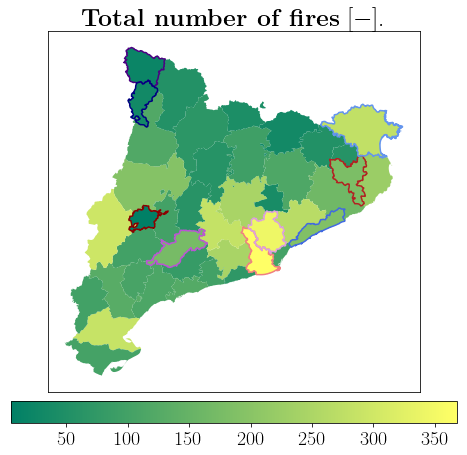

In [9]:
colors = {"Pla d'Urgell":'darkred',
          "Gironès":'firebrick',
          "Baix Llobregat":'lightcoral',
          "Val d'Aran":'indigo',
          "Conca de Barberà":'mediumorchid',
          "Vallès Occidental":'plum',
          "Alta Ribagorça":'navy',
          "Maresme":'royalblue',
          "Alt Empordà":'cornflowerblue'}

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'\textbf{Total number of fires} $[-]$.', fontsize = 25)
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
#ax.tick_params(labelsize='50')

merged_num_incendis_gdf.plot(column = 'num_incendis',
                                  ax=ax,
                                  cmap='summer',
                                  legend=True,
                                  legend_kwds={#'label':r"{Total number of fires $[-]$}",
                                               'orientation': "horizontal", 'pad': 0.02})
merged_num_incendis_gdf = merged_num_incendis_gdf.set_index("comarca")
merged_num_incendis_gdf.loc[list(colors.keys()), :].boundary.plot(ax=ax, color=list(colors.values()))
merged_num_incendis_gdf = merged_num_incendis_gdf.reset_index()

cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=20)
cb_ax.legend(fontsize=20)
plt.savefig("total_incendis_comarca.pdf")

### Working on the selected regions (comarques)
We will now make a dynamical study of the number of fires and total burned forestal by year, for each of the selected, up mentioned, regions. We will start making simple bar plots for the number of fires on each one. This will be done on order, following the sets 1, 2 and 3 up mentioned.

In [10]:
# Let's start by adding the year and month to two different columns on the original DataFrame so that we can make the appropiate
# histograms (maybe also include season)

dates_df = results_df.data_incendi # we keep the dates of each one on a data frame
years = [i[:4] for i in list(dates_df)] # years of each forest fire...
months = [i[5:7] for i in list(dates_df)] # months of each forest fire...

# we could also try to make one related to season.

results_df["any"] = years
results_df["month"] = months
results_df

,data_incendi,codi_comarca,comarca,codi_municipi,termemunic,haarbrades,hanoarbrad,hanoforest,haforestal,any,month
0,2011-01-11T00:00:00.000,8,Baix Camp,431299,Riudoms,0,0.2,0,0.20,2011,01
1,2011-01-13T00:00:00.000,37,Terra Alta,430483,Corbera d'Ebre,0.2,0,0,0.20,2011,01
2,2011-01-14T00:00:00.000,2,Alt Empordà,170545,Colera,0.01,0,0,0.01,2011,01
3,2011-01-16T00:00:00.000,24,Osona,82802,Tavertet,0,0.02,0,0.02,2011,01
4,2011-01-16T00:00:00.000,19,Garrotxa,171498,Riudaura,0,0.43,0,0.43,2011,01
...,...,...,...,...,...,...,...,...,...,...,...
5843,2021-12-21T00:00:00.000,31,Ripollès,171479,Ripoll,0,0.1,0,0.10,2021,12
5844,2021-12-23T00:00:00.000,2,Alt Empordà,170470,Castelló d'Empúries,0,0.2,0,0.20,2021,12
5845,2021-12-29T00:00:00.000,8,Baix Camp,430094,Alforja,0,0.75,0,0.75,2021,12
5846,2021-12-29T00:00:00.000,21,Maresme,82140,Vilassar de Dalt,0.01,0,0,0.01,2021,12


In [11]:
# we now make a compy and take out the columns of forestal and non forestal areas (we won't be interested on it from now on)
copy_results_df = results_df

In [12]:
# we eliminate the columns we are not interested in
copy_results_df = copy_results_df.drop(columns=['haarbrades', 'hanoarbrad', 'hanoforest'])
copy_results_df

,data_incendi,codi_comarca,comarca,codi_municipi,termemunic,haforestal,any,month
0,2011-01-11T00:00:00.000,8,Baix Camp,431299,Riudoms,0.20,2011,01
1,2011-01-13T00:00:00.000,37,Terra Alta,430483,Corbera d'Ebre,0.20,2011,01
2,2011-01-14T00:00:00.000,2,Alt Empordà,170545,Colera,0.01,2011,01
3,2011-01-16T00:00:00.000,24,Osona,82802,Tavertet,0.02,2011,01
4,2011-01-16T00:00:00.000,19,Garrotxa,171498,Riudaura,0.43,2011,01
...,...,...,...,...,...,...,...,...
5843,2021-12-21T00:00:00.000,31,Ripollès,171479,Ripoll,0.10,2021,12
5844,2021-12-23T00:00:00.000,2,Alt Empordà,170470,Castelló d'Empúries,0.20,2021,12
5845,2021-12-29T00:00:00.000,8,Baix Camp,430094,Alforja,0.75,2021,12
5846,2021-12-29T00:00:00.000,21,Maresme,82140,Vilassar de Dalt,0.01,2021,12


27 11 20
5.0 368.0 181.0


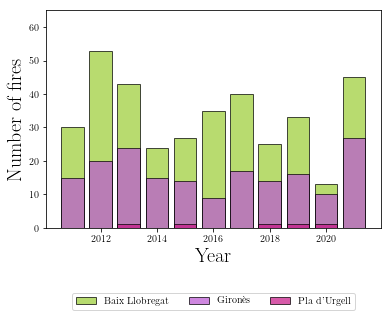

In [13]:
#First, Set 1. A very simple heuristic plot in order to find better setting for the final figure, in the cell under.
# (visual aid)
print(codi_min_1, codi_max_1, codi_pm_1)
min_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_min_1)]
max_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_max_1)]
pm_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_pm_1)]

min_nff = [] # number of forest fires each year
max_nff = [] # number of forest fires each year
pm_nff = [] # number of forest fires each year

years_list=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
years_list_int=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

for i in years_list:
    indxs_year_min = min_df[min_df["any"]==i].index
    nff_year_min = len(indxs_year_min)
    indxs_year_max = max_df[max_df["any"]==i].index
    nff_year_max = len(indxs_year_max)
    indxs_year_pm = pm_df[pm_df["any"]==i].index
    nff_year_pm = len(indxs_year_pm)
    
    min_nff.append(nff_year_min)
    max_nff.append(nff_year_max)
    pm_nff.append(nff_year_pm)
    
    
min_tot = 0.0
max_tot = 0.0
pm_tot = 0.0
for i in range(0, len(years_list_int)):
    min_tot = min_tot + min_nff[i]
    max_tot = max_tot + max_nff[i]
    pm_tot = pm_tot + pm_nff[i]

print(min_tot,max_tot,pm_tot) # we print the number of total fires to verify the code works

#plot configuration for the first set of 3.
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of fires', fontsize = 20)
plt.ylim([0,65])

plt.bar(years_list_int, max_nff, edgecolor='black', color = 'yellowgreen', alpha=0.7 )
plt.bar(years_list_int, pm_nff, edgecolor='black', color = 'mediumorchid', alpha=0.7 )
plt.bar(years_list_int, min_nff, edgecolor='black', color = 'mediumvioletred', alpha=0.7)

plt.legend(['Baix Llobregat', "Giron\`es", "Pla d'Urgell"], bbox_to_anchor=(0.5,-0.4),loc ="lower center", ncol=3)
plt.show()

min: 27 pm: 20 max: 11
[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
[15, 20, 24, 15, 14, 9, 17, 14, 16, 10, 27]
[30, 53, 43, 24, 27, 35, 40, 25, 33, 13, 45]


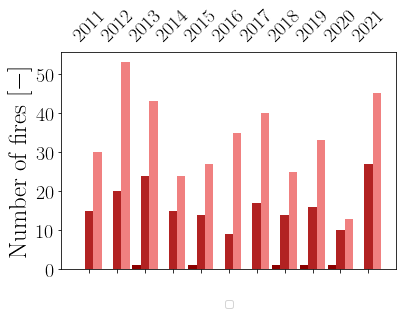

In [14]:
# now we implement code for the figure that goes on the article.
#plot configuration for the first set of 3.
print("min:",codi_min_1, "pm:", codi_pm_1, "max:", codi_max_1)

print(min_nff) # print to check
print(pm_nff) # print to check
print(max_nff) # print to check

pos_min = [(float(i)-0.3) for i in years_list_int]
pos_pm = years_list_int
pos_max = [(float(i)+0.3) for i in years_list_int]


fig, ax = plt.subplots(1, 1)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.set_tick_params(labelbottom=False)
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams['xtick.bottom'] = True #plt.rcParams['xlabel'] = False
plt.rcParams['xtick.top'] = True #plt.rcParam[''] =  True
plt.ylabel('Number of fires [$-$]', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
plt.xticks([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])


plt.bar(pos_min, min_nff, color = 'darkred', alpha=1, width=0.3)
plt.bar(pos_pm, pm_nff,color = 'firebrick', alpha=1, width=0.3)
plt.bar(pos_max, max_nff,color = 'lightcoral', alpha=1, width=0.3)

plt.legend([], bbox_to_anchor=(0.5,-0.2), loc ="lower center", ncol=3)
plt.savefig('nff_hist_set_1.pdf', bbox_inches='tight')
plt.show()

39 40 16
21.0 343.0 175.0


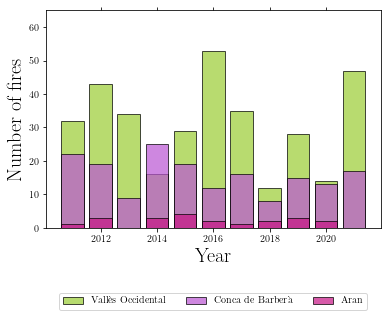

In [15]:
# Now it is SET 2's turn.

print(codi_min_2,codi_max_2,codi_pm_2)
min_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_min_2)]
max_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_max_2)]
pm_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_pm_2)]

min_nff = [] # number of forest fires each year
max_nff = [] # number of forest fires each year
pm_nff = [] # number of forest fires each year

years_list=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
years_list_int=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

for i in years_list:
    indxs_year_min = min_df[min_df["any"]==i].index
    nff_year_min = len(indxs_year_min)
    indxs_year_max = max_df[max_df["any"]==i].index
    nff_year_max = len(indxs_year_max)
    indxs_year_pm = pm_df[pm_df["any"]==i].index
    nff_year_pm = len(indxs_year_pm)
    
    min_nff.append(nff_year_min)
    max_nff.append(nff_year_max)
    pm_nff.append(nff_year_pm)

min_tot = 0.0
max_tot = 0.0
pm_tot = 0.0
for i in range(0, len(years_list_int)):
    min_tot = min_tot + min_nff[i]
    max_tot = max_tot + max_nff[i]
    pm_tot = pm_tot + pm_nff[i]

print(min_tot,max_tot,pm_tot) 

#plot configuration for the first set of 3.
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of fires', fontsize = 20)
plt.ylim([0,65])

plt.bar(years_list_int, max_nff, edgecolor='black', color = 'yellowgreen', alpha=0.7 )
plt.bar(years_list_int, pm_nff, edgecolor='black', color = 'mediumorchid', alpha=0.7 )
plt.bar(years_list_int, min_nff, edgecolor='black', color = 'mediumvioletred', alpha=0.7)

plt.legend(['Vall\`es Occidental', "Conca de Barber\`a", "Aran"], bbox_to_anchor=(0.5,-0.4),loc ="lower center", ncol=3)
plt.show()

min: 39 pm: 16 max: 40
[1, 3, 0, 3, 4, 2, 1, 2, 3, 2, 0]
[22, 19, 9, 25, 19, 12, 16, 8, 15, 13, 17]
[32, 43, 34, 16, 29, 53, 35, 12, 28, 14, 47]


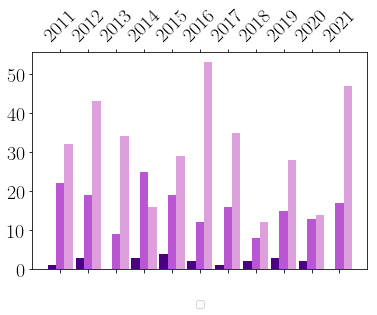

In [16]:
# the one that goes in the article for Set 2...
print("min:",codi_min_2, "pm:", codi_pm_2, "max:", codi_max_2)

print(min_nff)
print(pm_nff)
print(max_nff)

pos_min = [(float(i)-0.3) for i in years_list_int]
pos_pm = years_list_int
pos_max = [(float(i)+0.3) for i in years_list_int]

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.set_tick_params(labelbottom=False)
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
#plt.xlabel('Year', fontsize = 25)
#plt.ylabel('Number of fires [$-$]', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
#plt.ylim([0,60])
plt.xticks([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
#plt.yscale('log')

plt.bar(pos_min, min_nff, color = 'indigo', alpha=1, width=0.3)
plt.bar(pos_pm, pm_nff, color = 'mediumorchid', alpha=1, width=0.3)
plt.bar(pos_max, max_nff, color = 'plum', alpha=1, width=0.3)


plt.legend([], bbox_to_anchor=(0.5,-0.2), loc ="lower center", ncol=3)
plt.savefig('nff_hist_set_2.pdf', bbox_inches='tight')
plt.show()

5 2 21
31.0 279.0 189.0


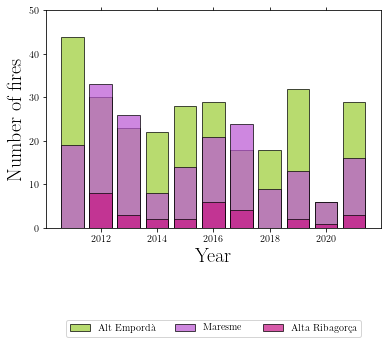

In [17]:
# Now SET 3's turn...
print(codi_min_3, codi_max_3, codi_pm_3)
min_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_min_3)]
max_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_max_3)]
pm_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_pm_3)]

min_nff = [] # number of forest fires each year
max_nff = [] # number of forest fires each year
pm_nff = [] # number of forest fires each year

years_list=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
years_list_int=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

for i in years_list:
    indxs_year_min = min_df[min_df["any"]==i].index
    nff_year_min = len(indxs_year_min)
    indxs_year_max = max_df[max_df["any"]==i].index
    nff_year_max = len(indxs_year_max)
    indxs_year_pm = pm_df[pm_df["any"]==i].index
    nff_year_pm = len(indxs_year_pm)
    
    min_nff.append(nff_year_min)
    max_nff.append(nff_year_max)
    pm_nff.append(nff_year_pm)
    
    
min_tot = 0.0
max_tot = 0.0
pm_tot = 0.0
for i in range(0, len(years_list_int)):
    min_tot = min_tot + min_nff[i]
    max_tot = max_tot + max_nff[i]
    pm_tot = pm_tot + pm_nff[i]

print(min_tot,max_tot,pm_tot) 

#plot configuration for the first set of 3.
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of fires', fontsize = 20)
plt.ylim([0,50])

plt.bar(years_list_int, max_nff, edgecolor='black', color = 'yellowgreen', alpha=0.7 )
plt.bar(years_list_int, pm_nff, edgecolor='black', color = 'mediumorchid', alpha=0.7 )
plt.bar(years_list_int, min_nff, edgecolor='black', color = 'mediumvioletred', alpha=0.7)

plt.legend(['Alt Empord\`a', "Maresme", "Alta Ribagor\c {c}a"], bbox_to_anchor=(0.5,-0.4) ,loc ="upper center", ncol=3)
plt.show()

min: 5 pm: 21 max: 2
[0, 8, 3, 2, 2, 6, 4, 0, 2, 1, 3]
[19, 33, 26, 8, 14, 21, 24, 9, 13, 6, 16]
[44, 30, 23, 22, 28, 29, 18, 18, 32, 6, 29]


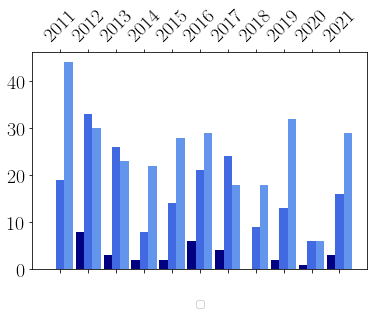

In [18]:
# SET 3's article plot...
print("min:",codi_min_3, "pm:", codi_pm_3, "max:", codi_max_3)

print(min_nff)
print(pm_nff)
print(max_nff)

pos_min = [(float(i)-0.3) for i in years_list_int]
pos_pm = years_list_int
pos_max = [(float(i)+0.3) for i in years_list_int]

fig, ax = plt.subplots(1, 1)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.set_tick_params(labelbottom=False)
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
plt.xticks([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.bar(pos_min, min_nff, color = 'navy', alpha=1, width=0.3)
plt.bar(pos_pm, pm_nff, color = 'royalblue', alpha=1, width=0.3)
plt.bar(pos_max, max_nff, color = 'cornflowerblue', alpha=1, width=0.3)


plt.legend([], bbox_to_anchor=(0.5,-0.2), loc ="lower center", ncol=3)
plt.savefig('nff_hist_set_3.pdf', bbox_inches='tight')
plt.show()

**Now we start with the burned forestal area by year and region, following the same order.**

In [19]:
# Let's now deal with the amount of burned forestal area per year for each of the comarques.
# we start from the modified data set in which only forestal area is specified.
copy_results_df

,data_incendi,codi_comarca,comarca,codi_municipi,termemunic,haforestal,any,month
0,2011-01-11T00:00:00.000,8,Baix Camp,431299,Riudoms,0.20,2011,01
1,2011-01-13T00:00:00.000,37,Terra Alta,430483,Corbera d'Ebre,0.20,2011,01
2,2011-01-14T00:00:00.000,2,Alt Empordà,170545,Colera,0.01,2011,01
3,2011-01-16T00:00:00.000,24,Osona,82802,Tavertet,0.02,2011,01
4,2011-01-16T00:00:00.000,19,Garrotxa,171498,Riudaura,0.43,2011,01
...,...,...,...,...,...,...,...,...
5843,2021-12-21T00:00:00.000,31,Ripollès,171479,Ripoll,0.10,2021,12
5844,2021-12-23T00:00:00.000,2,Alt Empordà,170470,Castelló d'Empúries,0.20,2021,12
5845,2021-12-29T00:00:00.000,8,Baix Camp,430094,Alforja,0.75,2021,12
5846,2021-12-29T00:00:00.000,21,Maresme,82140,Vilassar de Dalt,0.01,2021,12


27 11 20
[4.538899999999999, 8.976499999999998, 82.45140000000002, 3.8433000000000006, 7.659500000000001, 17.091999999999995, 18.893699999999995, 10.294299999999996, 2.2655999999999996, 0.6724000000000001, 204.68]
[9.010000000000002, 196.0157, 5.5576, 8.4977, 43.5991, 0.996, 3.325299999999999, 1.0475999999999996, 0.5912000000000001, 0.3318, 4.0117]
[0.0, 0.0, 0.006, 0.0, 0.16, 0.0, 0.0, 0.084, 0.205, 0.157, 0.0]


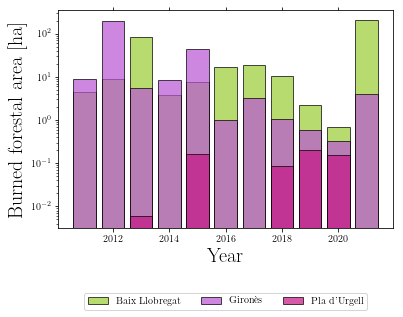

In [20]:
# we want first to take the DataFrame for each comarca
# again, starting with the first set.
print(codi_min_1, codi_max_1, codi_pm_1)
min_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_min_1)]
max_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_max_1)]
pm_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_pm_1)]

years_list=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
years_list_int=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

min_forestal_total=[]
max_forestal_total=[]
pm_forestal_total=[]

# now we have to group these DataFrames by year and compute the total burned forestal area
# and add it into the corresponding vectors

min_df_year = min_df[min_df['any']=='2019']
min_df_year_haforestal = min_df_year.groupby(['any']).sum()
#min_df_2013
#min_df_2013_haforestal
pm_df_year = pm_df[pm_df['any']=='2016']
pm_df_year_haforestal = pm_df_year.groupby(['any']).sum()
#pm_df_year
pm_df_year_haforestal

for i in years_list:
    #min incendis
    min_df_year = min_df[min_df['any']==i]
    min_df_year_haforestal = min_df_year.groupby(['any']).sum()
    #max incendis
    max_df_year = max_df[max_df['any']==i]
    max_df_year_haforestal = max_df_year.groupby(['any']).sum()
    #pm incendis
    pm_df_year = pm_df[pm_df['any']==i]
    pm_df_year_haforestal = pm_df_year.groupby(['any']).sum()
    
    # we fill the vector for the comarca with min
    if (min_df_year_haforestal.haforestal.any()):
        for j in min_df_year_haforestal.iloc[0]:
            min_forestal_total.append(j)
    else:
        min_forestal_total.append(0.0)
         
    # we fill the vector for the comarca with max        
    if (max_df_year_haforestal.haforestal.any()):
        for j in max_df_year_haforestal.iloc[0]:
            max_forestal_total.append(j)
    else:
        max_forestal_total.append(0.0)            
    
    # we fill the vector for the comarca with min
    if (pm_df_year_haforestal.haforestal.any()):
        for j in pm_df_year_haforestal.iloc[0]:
            pm_forestal_total.append(j)
    else:
        pm_forestal_total.append(0.0)

        
print(max_forestal_total) # print the burned forestal area by year to check
print(pm_forestal_total) # print the burned forestal area by year to check
print(min_forestal_total) # print the burned forestal area by year to check
        
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Burned forestal area [ha]', fontsize = 20)
plt.yscale('log')

plt.bar(years_list_int, max_forestal_total, edgecolor='black', color = 'yellowgreen', alpha=0.7 )
plt.bar(years_list_int, pm_forestal_total, edgecolor='black', color = 'mediumorchid', alpha=0.7 )
plt.bar(years_list_int, min_forestal_total, edgecolor='black', color = 'mediumvioletred', alpha=0.7)

plt.legend(['Baix Llobregat', "Giron\`es", "Pla d'Urgell"], bbox_to_anchor=(0.5,-0.4), loc ="lower center", ncol=3)
plt.show()

min: 27 pm: 20 max: 11


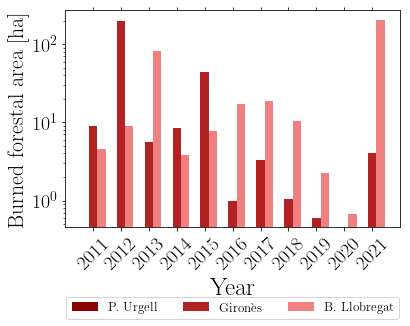

In [21]:
#we have to define vector to center our bars, min, pm, max (sempre)
# SET 1's turn, figure goes to the article.

print("min:",codi_min_1,"pm:",codi_pm_1,"max:",codi_max_1)

#print(min_forestal_total)
#print(pm_forestal_total)
#print(max_forestal_total)

pos_min = [(float(i)-0.3) for i in years_list_int]
pos_pm = years_list_int
pos_max = [(float(i)+0.3) for i in years_list_int]

#print(pos_max)
#print(pos_pm)
#print(pos_min)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 25)
plt.ylabel('Burned forestal area [ha]', fontsize = 22)
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
plt.rc('legend',fontsize=13)
plt.xticks([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.yscale('log')

plt.bar(pos_min, min_forestal_total, color = 'darkred', alpha=1, width = 0.3)
plt.bar(pos_pm, pm_forestal_total, color = 'firebrick', alpha=1, width = 0.3 )
plt.bar(pos_max, max_forestal_total, color = 'lightcoral', alpha=1, width = 0.3 )


plt.legend(["P. Urgell", "Giron\`es", "B. Llobregat"], bbox_to_anchor=(0.5,-0.45), loc ="lower center", ncol=3)
plt.savefig('aforestal_hist_set_1.pdf', bbox_inches='tight')
plt.show()

39 40 16
[7.4186, 6.027399999999999, 5.403500000000001, 2.8131999999999993, 8.177500000000002, 6.984999999999999, 16.925899999999995, 0.9593999999999999, 2.102699999999999, 0.6356999999999999, 12.703100000000003]
[8.3271, 42.349999999999994, 0.891, 8.772999999999998, 15.0464, 9.183800000000002, 8.371, 0.7540000000000001, 4.7644, 1.4862, 1355.9942999999998]
[10.5, 28.801999999999996, 0.0, 16.4, 98.32000000000001, 27.5, 432.3, 1.87, 244.616, 0.022, 0.0]


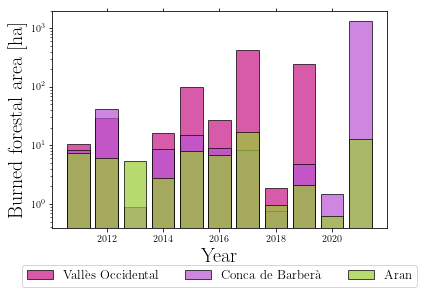

In [22]:
# SET 2's turn now...
# we want first to take the DataFrame for each comarca
# again, starting with the first set.
print(codi_min_2, codi_max_2, codi_pm_2)
min_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_min_2)]
max_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_max_2)]
pm_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_pm_2)]

years_list=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
years_list_int=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

min_forestal_total=[]
max_forestal_total=[]
pm_forestal_total=[]

# now we have to group these DataFrames by year and compute the total burned forestal area
# and add it into the corresponding vectors

min_df_year = min_df[min_df['any']=='2019']
min_df_year_haforestal = min_df_year.groupby(['any']).sum()
#min_df_2013
#min_df_2013_haforestal
pm_df_year = pm_df[pm_df['any']=='2016']
pm_df_year_haforestal = pm_df_year.groupby(['any']).sum()
#pm_df_year
pm_df_year_haforestal

for i in years_list:
    #min incendis
    min_df_year = min_df[min_df['any']==i]
    min_df_year_haforestal = min_df_year.groupby(['any']).sum()
    #max incendis
    max_df_year = max_df[max_df['any']==i]
    max_df_year_haforestal = max_df_year.groupby(['any']).sum()
    #pm incendis
    pm_df_year = pm_df[pm_df['any']==i]
    pm_df_year_haforestal = pm_df_year.groupby(['any']).sum()
    
    # we fill the vector for the comarca with min
    if (min_df_year_haforestal.haforestal.any()):
        for j in min_df_year_haforestal.iloc[0]:
            min_forestal_total.append(j)
    else:
        min_forestal_total.append(0.0)
         
    # we fill the vector for the comarca with max        
    if (max_df_year_haforestal.haforestal.any()):
        for j in max_df_year_haforestal.iloc[0]:
            max_forestal_total.append(j)
    else:
        max_forestal_total.append(0.0)            
    
    # we fill the vector for the comarca with min
    if (pm_df_year_haforestal.haforestal.any()):
        for j in pm_df_year_haforestal.iloc[0]:
            pm_forestal_total.append(j)
    else:
        pm_forestal_total.append(0.0)
     

print(max_forestal_total)
print(pm_forestal_total)
print(min_forestal_total)
        
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Burned forestal area [ha]', fontsize = 20)
plt.yscale('log')

plt.bar(years_list_int, min_forestal_total, edgecolor='black', color = 'mediumvioletred', alpha=0.7)
plt.bar(years_list_int, pm_forestal_total, edgecolor='black', color = 'mediumorchid', alpha=0.7 )
plt.bar(years_list_int, max_forestal_total, edgecolor='black', color = 'yellowgreen', alpha=0.7 )


plt.legend(['Vall\`es Occidental', "Conca de Barber\`a", "Aran"], bbox_to_anchor=(0.5,-0.3), loc ="lower center", ncol=3)
plt.show()

min: 39 pm: 16 max: 40


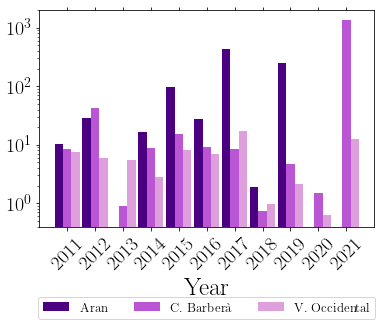

In [23]:
#we have to define vector to center our bars, min, pm, max (sempre)
print("min:",codi_min_2,"pm:",codi_pm_2,"max:",codi_max_2)

#print(min_forestal_total)
#print(pm_forestal_total)
#print(max_forestal_total)

pos_min = [(float(i)-0.3) for i in years_list_int]
pos_pm = years_list_int
pos_max = [(float(i)+0.3) for i in years_list_int]

#print(pos_max)
#print(pos_pm)
#print(pos_min)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
plt.rc('legend',fontsize=13)
plt.xticks([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.yscale('log')

plt.bar(pos_min, min_forestal_total, color = 'indigo', alpha=1, width = 0.3)
plt.bar(pos_pm, pm_forestal_total, color = 'mediumorchid', alpha=1, width = 0.3 )
plt.bar(pos_max, max_forestal_total, color = 'plum', alpha=1, width = 0.3 )

plt.legend(["Aran", "C. Barber\`a", "V. Occidental"], bbox_to_anchor=(0.5,-0.45), loc ="lower center", ncol=3)
plt.savefig('aforestal_hist_set_2.pdf', bbox_inches='tight')
plt.show()

5 2 21
[153.9805, 8788.887999999999, 8.8025, 38.908, 24.129699999999996, 81.55829999999999, 6.9652, 24.1689, 4.137500000000001, 3.776, 466.48419999999993]
[2.6374999999999993, 5.5539999999999985, 3.358999999999999, 9.762199999999998, 2.6486, 8.445, 18.588800000000006, 1.016, 1.4440000000000002, 0.8837999999999999, 15.273299999999997]
[0.0, 217.9, 0.025, 1.15, 0.9015, 6.880799999999999, 22.509, 0.0, 0.25, 0.006, 0.2801]


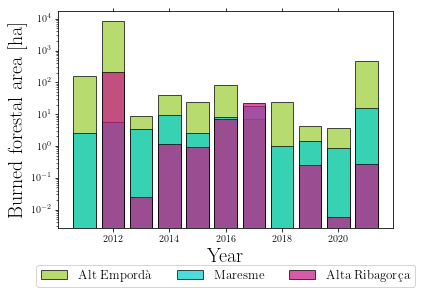

In [24]:
# SET 3's turn now...
# we want first to take the DataFrame for each comarca
# again, starting with the first set.
print(codi_min_3, codi_max_3, codi_pm_3)
min_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_min_3)]
max_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_max_3)]
pm_df = copy_results_df[copy_results_df["codi_comarca"]==str(codi_pm_3)]

years_list=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
years_list_int=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

min_forestal_total=[]
max_forestal_total=[]
pm_forestal_total=[]

# now we have to group these DataFrames by year and compute the total burned forestal area
# and add it into the corresponding vectors

for i in years_list:
    #min incendis
    min_df_year = min_df[min_df['any']==i]
    min_df_year_haforestal = min_df_year.groupby(['any']).sum()
    #max incendis
    max_df_year = max_df[max_df['any']==i]
    max_df_year_haforestal = max_df_year.groupby(['any']).sum()
    #pm incendis
    pm_df_year = pm_df[pm_df['any']==i]
    pm_df_year_haforestal = pm_df_year.groupby(['any']).sum()
    
    # we fill the vector for the comarca with min
    if (min_df_year_haforestal.haforestal.any()):
        for j in min_df_year_haforestal.iloc[0]:
            min_forestal_total.append(j)
    else:
        min_forestal_total.append(0.0)
         
    # we fill the vector for the comarca with max        
    if (max_df_year_haforestal.haforestal.any()):
        for j in max_df_year_haforestal.iloc[0]:
            max_forestal_total.append(j)
    else:
        max_forestal_total.append(0.0)            
    
    # we fill the vector for the comarca with min
    if (pm_df_year_haforestal.haforestal.any()):
        for j in pm_df_year_haforestal.iloc[0]:
            pm_forestal_total.append(j)
    else:
        pm_forestal_total.append(0.0)

        
print(max_forestal_total)
print(pm_forestal_total)
print(min_forestal_total)
        
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Burned forestal area [ha]', fontsize = 20)
plt.yscale('log')

plt.bar(years_list_int, max_forestal_total, edgecolor='black', color = 'yellowgreen', alpha=0.7 )
plt.bar(years_list_int, pm_forestal_total, edgecolor='black', color = 'darkturquoise', alpha=0.7 )
plt.bar(years_list_int, min_forestal_total, edgecolor='black', color = 'mediumvioletred', alpha=0.7)

plt.legend(['Alt Empord\`a', "Maresme", "Alta Ribagor\c {c}a"], bbox_to_anchor=(0.5,-0.3), loc ="lower center", ncol=3)
plt.show()

min: 5 pm: 21 max: 2


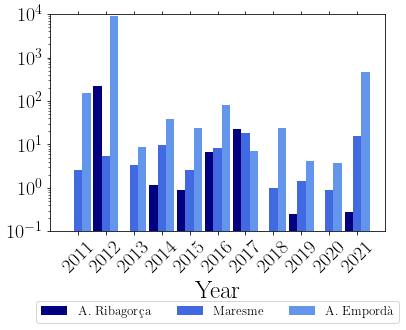

In [25]:
#we have to define vector to center our bars, min, pm, max (sempre)
print("min:",codi_min_3,"pm:",codi_pm_3,"max:",codi_max_3)

pos_min = [(float(i)-0.3) for i in years_list_int]
pos_pm = years_list_int
pos_max = [(float(i)+0.3) for i in years_list_int]

#print(pos_max)
#print(pos_pm)
#print(pos_min)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.xlabel('Year', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
plt.rc('legend',fontsize=13)
plt.ylim([10**(-1),10**4])
plt.xticks([2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.yscale('log')

plt.bar(pos_min, min_forestal_total, color = 'navy', alpha=1, width = 0.3)
plt.bar(pos_pm, pm_forestal_total, color = 'royalblue', alpha=1, width = 0.3 )
plt.bar(pos_max, max_forestal_total, color = 'cornflowerblue', alpha=1, width = 0.3 )

plt.legend(['A. Ribagor\c ca', "Maresme", "A. Empord\`a"], bbox_to_anchor=(0.5,-0.45), loc ="lower center", ncol=3)
plt.savefig('aforestal_hist_set_3.pdf', bbox_inches='tight')
plt.show()